In [2]:
import pandas as pd
# from google.colab import files
# files.upload()

In [4]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0


In [6]:
X = scaled_df.drop(columns=["price"])
y = scaled_df["price"]

num_features = X.shape[1]

weights = np.random.randn(num_features)

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [16]:
learning_rates = [0.1, 0.01, 0.5]
num_epochs = 50
loss_history = {}
for lr in learning_rates:
    weights = np.random.randn(num_features)
    losses = []
    print(f"\nTraining with learning rate = {lr}")
    for ep in range(num_epochs):
        # Forward pass
        z = np.dot(X, weights)
        pred_y = sigmoid(z)
        # Compute error
        error = np.mean((pred_y - y) ** 2)
        losses.append(error)
        # Print
        print(f"Epoch: {ep}, Loss: {error}")
        # Backpropagation
        dE_dy = pred_y - y
        dy_dz = sigmoid(z) * (1 - sigmoid(z))
        dz_dw = X
        gradient = np.dot(dz_dw.T, dE_dy * dy_dz) / len(X)
        weights = weights - (lr * gradient)
    loss_history[lr] = losses


Training with learning rate = 0.1
Epoch: 0, Loss: 0.3031435325277457
Epoch: 1, Loss: 0.30186804791226524
Epoch: 2, Loss: 0.3005895974156605
Epoch: 3, Loss: 0.299308275560833
Epoch: 4, Loss: 0.2980241781802547
Epoch: 5, Loss: 0.29673740238361945
Epoch: 6, Loss: 0.29544804652429285
Epoch: 7, Loss: 0.29415621016458726
Epoch: 8, Loss: 0.2928619940398899
Epoch: 9, Loss: 0.29156550002167425
Epoch: 10, Loss: 0.2902668310794274
Epoch: 11, Loss: 0.28896609124152645
Epoch: 12, Loss: 0.28766338555510046
Epoch: 13, Loss: 0.28635882004491536
Epoch: 14, Loss: 0.28505250167132123
Epoch: 15, Loss: 0.28374453828730234
Epoch: 16, Loss: 0.2824350385946727
Epoch: 17, Loss: 0.281124112099461
Epoch: 18, Loss: 0.2798118690665292
Epoch: 19, Loss: 0.2784984204734732
Epoch: 20, Loss: 0.27718387796384997
Epoch: 21, Loss: 0.2758683537997829
Epoch: 22, Loss: 0.2745519608139932
Epoch: 23, Loss: 0.2732348123613074
Epoch: 24, Loss: 0.2719170222696935
Epoch: 25, Loss: 0.2705987047908763
Epoch: 26, Loss: 0.26927997455

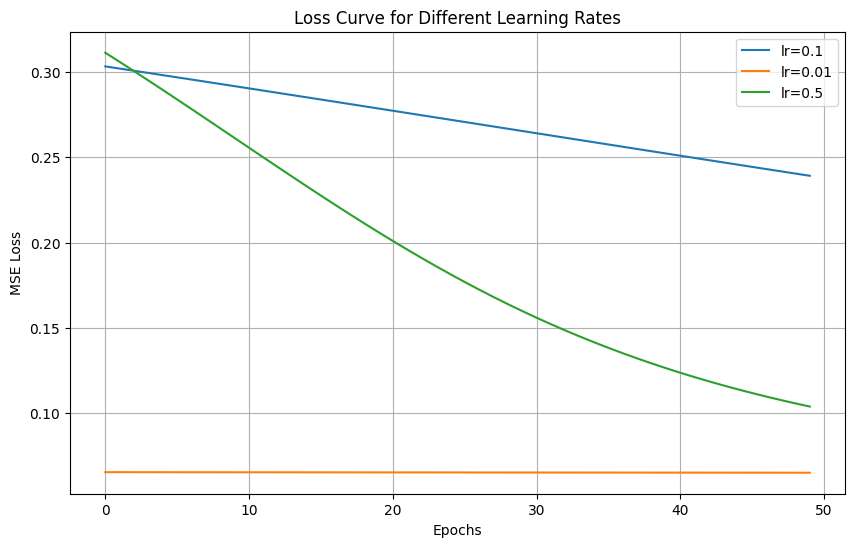

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for lr, losses in loss_history.items():
    plt.plot(range(num_epochs), losses, label=f"lr={lr}")

plt.title("Loss Curve for Different Learning Rates")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()